# Lab Work - Purdue 512 - Applied Regression Analysis

![](https://engineering.purdue.edu/Wraps/ECO/wrap7/images/logo.png)


Here is a set of lab work from minzhang's 2015 [Purdue - 512 Applied Regression](http://www.stat.purdue.edu/~minzhang/512-Spring2015/)


In [7]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [77]:
def ols_plot(x, x_name,y, y_name):
    # https://nbviewer.jupyter.org/github/mscaudill/IntroStatLearn/blob/master/notebooks/Ch3_Linear_Regression/Lab_Linear_Regression.ipynb
    # create a figure to plot our data and OLS estimate
    fig, ax = plt.subplots(figsize=(8,6))

    ax.scatter(x.values, y.values, facecolors='none',
              edgecolors='b', label='data')
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)

    # call scipy linregress returning fit coefficients and simple statistics
    beta1, beta0, r_value, p_value, stderr = stats.linregress(x.values, y.values)

    # add the estimation to the data plot
    ax.plot(x.values, beta0 + beta1 * x.values,
           color = 'r', label = 'OLS')
    ax.legend(loc='best')

    # print the regression estimates and returned from scipy
    print('beta = [', round(beta0,3), ',', round(beta1,3),']')
    print('R={0:.3f}, \np_value={1:.3f}, \nstderr={2:.3f}'.format(r_value, p_value, stderr))

def confident_bands_plot(model, x, y, alpha=0.05):
    # https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
    from statsmodels.sandbox.regression.predstd import wls_prediction_std

    # predictor variable (x) and dependent variable (y)

    # Retrieve our confidence interval values
    # _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
    # since wls_prediction_std(housing_model) returns 3 values
    _, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model, alpha=alpha)

    fig, ax = plt.subplots(figsize=(10,7))

    # plot the dots
    # 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
    ax.plot(x, y, 'o', label="data")

    # plot the trend line
    # g-- and r-- specify the color to use
    ax.plot(x, model.fittedvalues, 'g--.', label="OLS")

    # plot upper and lower ci values
    ax.plot(x, confidence_interval_upper, 'r--')
    ax.plot(x, confidence_interval_lower, 'r--')

    # plot legend
    ax.legend(loc='best');

## HW1 Problem 3

Grade point average. The director of admissions of a small college selected 120 students at
random from the new freshman class in a study to determine whether a student's grade point
average (OPA) at the end of the freshman year (Y) can be predicted from the ACT test score (X).
The results of the study follow. Assume that first-order regression model (1.1) is appropriate. 

In [11]:
gpa = pd.read_table("http://www.stat.purdue.edu/~minzhang/512-Spring2015/Datasets_files/CH01PR19.DAT",
                     header=None, names=['GPA','ACT_test_scores'],delim_whitespace=True)
gpa.head()

,GPA,ACT_test_scores
0,3.897,21
1,3.885,14
2,3.778,28
3,2.540,22
4,3.028,21


beta = [ 2.114 , 0.039 ]
R=0.269, 
p_value=0.003, 
stderr=0.013


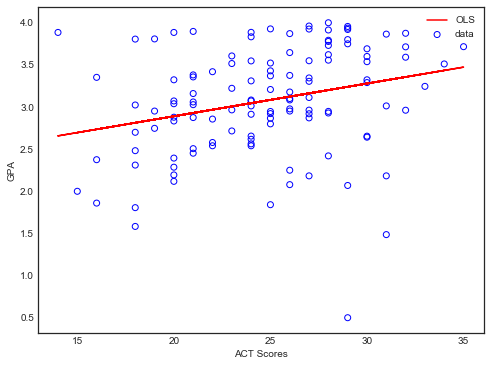

In [29]:
ols_plot(gpa.ACT_test_scores, 'ACT Scores', gpa.GPA, 'GPA')

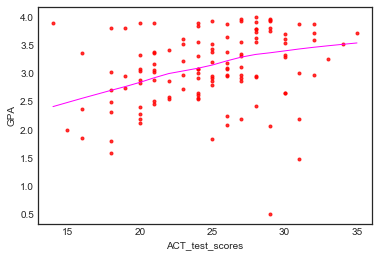

In [50]:
x =gpa.ACT_test_scores
y = gpa.GPA

sns.regplot(x, y, lowess=True, line_kws={"color":"magenta", "linewidth":1}, 
            scatter_kws={'color':'r', 's':9})

>Run a linear regression to predict GPA based on the entrance exam. Give the complete
ANOVA table for this regression.

In [14]:
model = smf.ols(formula='GPA~ACT_test_scores', data = gpa).fit()
print("estimated slope coefficient: ", model.params.ACT_test_scores)
print("SSR: ", model.mse_model)
print(sm.stats.anova_lm(model))

estimated slope coefficient:  0.038827126905259586
SSR:  3.5878458993130025
                    df     sum_sq   mean_sq         F    PR(>F)
ACT_test_scores    1.0   3.587846  3.587846  9.240243  0.002917
Residual         118.0  45.817608  0.388285       NaN       NaN


> Give a point estimate and a 94% confidence interval for the slope and intercept and
interpret each of these in words. (Point estimate is another word for parameter estimate.)

In [16]:
print(model.summary(alpha = 0.06))

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     9.240
Date:                Sun, 17 Feb 2019   Prob (F-statistic):            0.00292
Time:                        05:27:31   Log-Likelihood:                -112.50
No. Observations:                 120   AIC:                             229.0
Df Residuals:                     118   BIC:                             234.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|       [0.03       0.97]
-----------------------------------------------------------------------------------
Intercept           2.1140      0.321     

#### Analysis:
The regression equation for this problem is:
__GPA = 2.11 + 0.039 ACT_test_scores__


- __R-squared = 7%__ which indicates only 7% of the __varation in `GPA scores` is reducted by  taking into account ACT scores__
- __Slope__  = 0.0388 which means that `GPA` score rate increases 0.0388 units, on average, for each one unit incease in `ACT Test Scores`
- __Intercept__ = 2.11 which mean sthat if there were a student had a zero on the ACT test score the GPA would be 2.11. Since there were no students that had 0 on the ACT this intercept of the intercept is not practically meaniningful.

__Confidence Interval__ We can be 94% confident that the GPA scores is between 0.015 and 0.063. that is, ew can be 94% confident that for every additional one unit increase in ACT Test score, the mean GPA score rate increase between 0.015 and 0.063.

## HW1 Problem 4
>Plastic hardness. Refer to Problems 1.3 and 1.14. Sixteen batches of the plastic were made,
and from each batch one test item was molded. Each test item was randomly assigned to one of
the four predetermined time levels, and the hardness was measured after the assigned elapsed
time. The results are shown below; X is the elapsed time in hours? and Y is hardness in Brinell
units. Assume that first-order regression model (1.1) is appropria'te. 

In [64]:
plastic = pd.read_table("http://www.stat.purdue.edu/~minzhang/512_Spring2014/Datasets_files/CH01PR22.DAT",
                       header=None, names=['hardness','hours'],delim_whitespace=True)
plastic.head()

,hardness,hours
0,199.0,16.0
1,205.0,16.0
2,196.0,16.0
3,200.0,16.0
4,218.0,24.0


beta = [ 168.6 , 2.034 ]
R=0.986, 
p_value=0.000, 
stderr=0.090


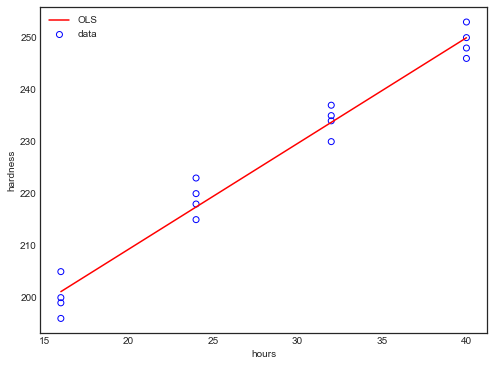

In [65]:
ols_plot(plastic.hours, 'hours', plastic.hardness, 'hardness')

This appears to be a (positive) linear relationship as observations are on the linear line. and the pvalue from the t-test for Beta = 0 is <0.001

> Run the linear regression to predict hardness from time. Give
i. the linear model used in this problem
ii. the estimated regression equation.

In [66]:
model = smf.ols(formula='hardness~hours', data = plastic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     506.5
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           2.16e-12
Time:                        07:09:18   Log-Likelihood:                -40.414
No. Observations:                  16   AIC:                             84.83
Df Residuals:                      14   BIC:                             86.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.6000      2.657     63.454      0.0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


Regression equation: __y-hat(hardness | hours) = 168.6 + 2.0344 hours__

_To answer the question Is there a relationship between x and y?_
- The null hypothesis is H0 : β1 = 0, and the alternative is HA : β1 6= 0.
- The observed test statistics is t = 22.51

Since the estimated slope of the line, b1  is 2.0344 and not 0 and there is a p-value <0.001, we can __reject the null hypothesis__ and conlcude there is sufficent evidence there is  __relationship between hours and hardness for plastic__ in the sample of 16 (14 degreees of freedom). We are 95% confident that for ever additional hour increase increment, the mean hardness rate increases between 1.84 and 2.228.

We could also say: __We reject H0 and conclude that the slope is non-zero. So there is a significant linear relationship between hardness and time.__

__R-squared = 97%__ this mean that 97% of the variation in plastic hardnes is due to or is explained by hours




### ... Plastic Continuation HW2 Problem 5-10
>Plot the data using proc gplot. Include a smoothed function on the plot by using the i =
smnn option on the symbol1 statement, where nn is a number between 1 and 99. Please use
the number 70. Is the relationship approximately linear?

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


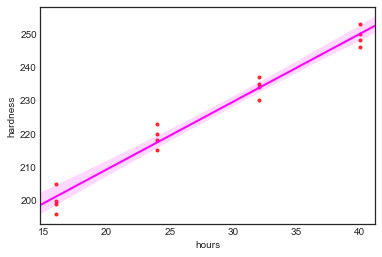

In [81]:
sns.regplot(x = 'hours', y= 'hardness', data = plastic, lowess=False, 
            line_kws={"color":"magenta", "linewidth":2}, 
            scatter_kws={'color':'r', 's':9})



Yes, the relationship is reasonably linear. There is some slight curvature at lower values of time but nothing substantial.


>6. Plot the 94% bounds (confidence band) for the mean (use i=rlclm on the symbol1 statement).

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


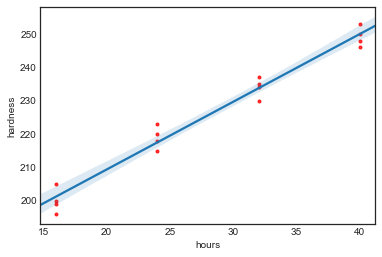

In [79]:
sns.regplot(x=plastic.hours, y=plastic.hardness, ci=94, scatter_kws={'color':'r', 's':9})

>7. Plot the 94% bounds for individual observations (using i=rlcli).

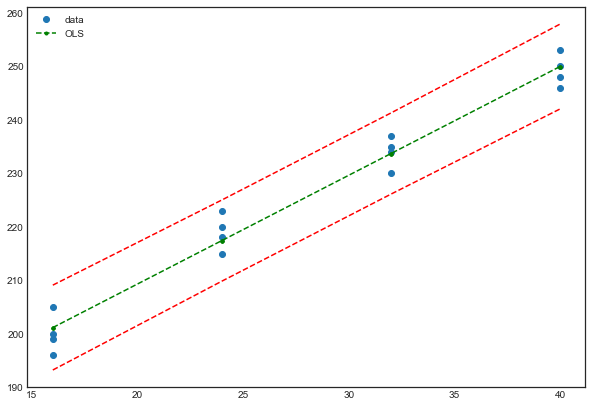

In [78]:
confident_bands_plot(model=model, x=plastic.hours, y=plastic.hardness, alpha=0.04)

>8. Give an estimate of the mean hardness that you would expect after 36 and 43 hours; and a
94% confidence interval for each estimate. Which confidence interval is wider and why is it
wider?


In [87]:
#Statsmodel - prediction for new observation

model.get_prediction(pd.DataFrame({'hours':[36, 43]})).summary_frame(alpha=0.06)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,241.837500,1.084726,239.617968,244.057032,234.857826,248.817174
1,256.078125,1.578660,252.847920,259.308330,248.714447,263.441803


__Based on the output, the predicted value of `hardness` at 36 hours is 241.84 and at 94% confidence interval for the mean hardness is between 239.62 and 244.06.__

__The output also give that at 43 hours, the _predicted hardness_ is 256.08 and at 94% ci for the mean hardness is between 252.85 and 259.31.__

__The confidence interval for X = 43 is wider because the value 43 is farther away from the sample mean x-bar than 36. As a result the standard error for the prediciton is larger.__


> 9. Give a prediction for the hardness that you would expect for an individual piece of plastic
after 43 hours; give a 94% prediction interval for this quantity

In [91]:
model.get_prediction(pd.DataFrame({'hours':[43]})).summary_frame(alpha=0.06)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,256.078125,1.57866,252.84792,259.30833,248.714447,263.441803


__The _predicted hardness_ is 256.08 after 43 hours; we are 94% confident that the hardness value will fall in the interval 248.71 to 263.44__